# Regularization

- Ridge Regression : L2 regularization 제곱의 합


- Lasso Regression : L1 regularization 절댓값의 합


- Elastic Net Regression : L1 + L2 regularization


    r : 혼합 비율
    0이면 L2와 동일, 1이면 L1과 동일


# 모형선택

규제가 없는 기본 선형 회귀를 수행후 과대적합이 확실시 되면 -> Ridge

전체 특성들 중 일부만 의미가 있다고 유추할 수 있거나 관찰 -> Lasso 또는 Elastic Net

특성들 간의 관련성(상관 계수)이 높음 -> Elastic Net 적용

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diab = datasets.load_diabetes()
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(diab.data, diab.target,\
                                 test_size=0.3, random_state=78)

In [3]:
l1_model = linear_model.Lasso(alpha=0.01).fit(X_train,y_train)
l2_model = linear_model.Ridge(alpha=0.01).fit(X_train,y_train)
    # alpha : regularization parameter
    # alpha=0 이면 일반 회귀분석

In [4]:
l1_y_pred = l1_model.predict(X_test)
l1_r2 = metrics.r2_score(y_test, l1_y_pred)

l2_y_pred = l2_model.predict(X_test)
l2_r2 = metrics.r2_score(y_test, l2_y_pred)

In [5]:
# 수정 R^2
n = X_train.shape[0] 
k = X_train.shape[1]

l1_adj_r2 = 1- ((1-l1_r2)*(n-1)/(n-k-1))
l2_adj_r2 = 1- ((1-l2_r2)*(n-1)/(n-k-1))

print(l1_adj_r2)
print(l2_adj_r2)

0.4923705615188325
0.4963113728068087


In [6]:
l1_coef = pd.Series(np.round(l1_model.coef_,3), index=diab.feature_names)\
.sort_values(ascending=False)
l2_coef = pd.Series(np.round(l2_model.coef_,3), index=diab.feature_names)\
.sort_values(ascending=False)

print(l1_coef)
print('')
print(l2_coef)

s5     825.933
bmi    451.930
s2     400.500
bp     367.985
s6      50.191
s4       0.000
s3      -0.000
age    -27.913
sex   -177.585
s1    -643.630
dtype: float64

s5     735.286
bmi    450.733
bp     367.440
s2     239.094
s6      60.548
s4     -23.619
age    -29.339
s3     -95.215
sex   -179.510
s1    -436.699
dtype: float64


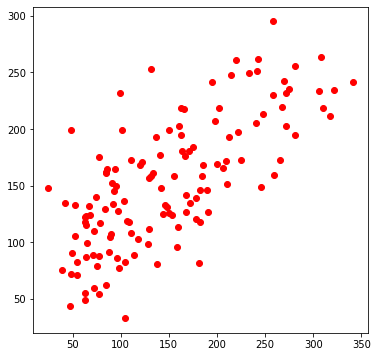

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, l1_y_pred, color='red')
plt.show()

In [18]:
# Ridge (L2)

alphas = [0, 0.1, 1, 10, 100]
df = pd.DataFrame()

for cnt in alphas:
    model = linear_model.Ridge(alpha=cnt).fit(diab.data, diab.target)
    coef = pd.Series(np.hstack((np.round(model.coef_, 3), np.round(model.intercept_, 3))),
                     index=[s.upper() for s in diab.feature_names]+['INTERCEPT'])
    df['alpha='+str(cnt)] = coef

print(df)

           alpha=0  alpha=0.1  alpha=1  alpha=10  alpha=100
AGE        -10.012      1.307   29.466    19.813      2.897
SEX       -239.819   -207.195  -83.155    -0.918      0.585
BMI        519.840    489.691  306.352    75.416      9.241
BP         324.390    301.769  201.629    55.025      6.931
S1        -792.184    -83.466    5.909    19.925      3.231
S2         476.746    -70.828  -29.516    13.949      2.617
S3         101.045   -188.680 -152.040   -47.554     -6.175
S4         177.064    115.713  117.312    48.259      6.678
S5         751.279    443.814  262.945    70.144      8.877
S6          67.625     86.749  111.879    44.214      5.956
INTERCEPT  152.133    152.133  152.133   152.133    152.133


In [19]:
# Lasso (L1)

alphas = [0, 0.1, 1, 10, 100]
df = pd.DataFrame()

for cnt in alphas:
    model = linear_model.Lasso(alpha=cnt).fit(diab.data, diab.target)
    coef = pd.Series(np.hstack((np.round(model.coef_, 3), np.round(model.intercept_, 3))),
                     index=[s.upper() for s in diab.feature_names]+['INTERCEPT'])
    df['alpha='+str(cnt)] = coef

print(df)

           alpha=0  alpha=0.1  alpha=1  alpha=10  alpha=100
AGE        -10.012     -0.000    0.000     0.000      0.000
SEX       -239.819   -155.363   -0.000     0.000      0.000
BMI        519.840    517.182  367.702     0.000      0.000
BP         324.390    275.082    6.302     0.000      0.000
S1        -792.184    -52.540    0.000     0.000      0.000
S2         476.746     -0.000    0.000     0.000      0.000
S3         101.045   -210.160   -0.000    -0.000     -0.000
S4         177.064      0.000    0.000     0.000      0.000
S5         751.279    483.914  307.606     0.000      0.000
S6          67.625     33.673    0.000     0.000      0.000
INTERCEPT  152.133    152.133  152.133   152.133    152.133


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631991.5781277429, tolerance: 262.1009124434389
  positive)


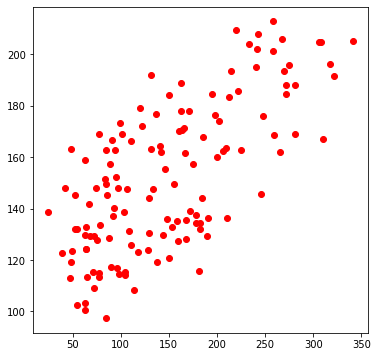

In [26]:
#Elastic Net Regression
elastic_model = linear_model.ElasticNet(alpha=0.01, l1_ratio=0.5).fit(X_train,y_train)
    # l1_ratio : 혼합 비율

elastic_y_pred = elastic_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, elastic_y_pred, color='red')
plt.show()